# Test agents

In [1]:
import sys

sys.path.insert(1, '../src')
import agents as ag
import lightbox as lb
#to not restart kernel on jupyter each time
import importlib
importlib.reload(lb)
importlib.reload(ag)

<module 'agents' from '../src/agents.py'>

## Creation and print

In [2]:
env = lb.LightBox()

In [3]:
age = ag.AbstractAgent(env)

In [ ]:
print(age)

In [ ]:
age.FMDP[1]["cpts"][2].print_tree()

## BIC

In [ ]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
s0 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s1 = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s1)

In [ ]:
age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s1)


In [ ]:
age.FMDP[1]["cpts"][1].add_datapoint(s0, 1, s0)

In [ ]:
age.FMDP[1]["cpts"][1].print_tree()
print(age.FMDP[1]["cpts"][1].children[0].dataset)
print(age.FMDP[1]["cpts"][1].children[0].compute_BIC_Mono())
#should return -12.89

## Refinement

In [ ]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
#Var 2 depend on var 1
#var 1
s_1_off = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_1_on = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#var 2
s_2_off = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_2_on = [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

print(age.FMDP[2]["cpts"][2].compute_BIC_Mono())

#1 off -> 1 off
for _ in range(10):
    age.update(s_1_off, 2, s_1_off)

#1 on -> 2 on (90% of the time)
for _ in range(9):
    age.update(s_1_on, 2, s_2_on)

#1 on -> 2 off (10%)
for _ in range(1):
    age.update(s_1_on, 2, s_1_off)
    
age.FMDP[2]["cpts"][2].print_tree()
age.FMDP[2]["cpts"][2].children[0].children[1].compute_BIC_Mono()

## Options

In [ ]:
importlib.reload(ag)
age = ag.AbstractAgent(env)

### Creation

In [ ]:
o = age.create_option(10, 1, [1,4,7], 0.8)

In [ ]:
o.print_tree()

#### On refinement : On

In [ ]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
#Var 2 depend on var 1
#var 1
s_1_off = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_1_on = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#var 2
s_2_off = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_2_on = [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

print(age.FMDP[2]["cpts"][2].compute_BIC_Mono())

#1 off -> 1 off
for _ in range(10):
    age.update(s_1_off, 2, s_1_off)

#1 on -> 2 on (90% of the time)
for _ in range(9):
    age.update(s_1_on, 2, s_2_on)

#1 on -> 2 off (10%)
for _ in range(1):
    age.update(s_1_on, 2, s_1_off)
    
age.FMDP[2]["cpts"][2].print_tree()
age.FMDP[2]["cpts"][2].children[0].children[1].compute_BIC_Mono()

In [ ]:
for o in age.options:
    age.options[o].print_tree()

#### On refinement : Off

In [ ]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
#Var 2 depend on var 1
#var 1
s_1_off = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_1_off_bis = [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_1_on = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#var 2
s_2_off = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_2_on = [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

print(age.FMDP[2]["cpts"][2].compute_BIC_Mono())

#1 off -> 1 off
for _ in range(10):
    age.update(s_1_off, 2, s_1_off)
    
#1 off -> 1 off
for _ in range(10):
    age.update(s_1_off_bis, 2, s_1_off)

#1 on -> 2 on (90% of the time)
for _ in range(9):
    age.update(s_1_on, 2, s_2_on)

#1 on -> 2 off (10%)
for _ in range(1):
    age.update(s_1_on, 2, s_1_on)
    
age.FMDP[2]["cpts"][2].print_tree()
age.FMDP[2]["cpts"][2].children[0].children[1].compute_BIC_Mono()

#print(age.FMDP[2]["cpts"][4].children[0].children[1].parents_list)
#for d in age.FMDP[2]["cpts"][4].children[0].children[0].dataset:
#    print("{} ; {}".format(d["s_0"],d["s_1"]))
#print("------------------------------------------------")

#for d in age.FMDP[2]["cpts"][4].children[0].children[1].dataset:
#    print("{} ; {}".format(d["s_0"],d["s_1"]))
for o in age.options:
    print(age.options[o])

In [ ]:
age.FMDP[2]["cpts"][4].print_tree()

In [ ]:
b0 = age.FMDP[2]["cpts"][4].children[0].children[0].compute_BIC_Mono()
b1 = age.FMDP[2]["cpts"][4].children[0].children[1].compute_BIC_Mono()
print("BIC : {} + {} = {}".format(b0, b1, b0+b1))

In [ ]:
age.FMDP[2]["cpts"][4].children[0].prune()

In [ ]:
age.FMDP[2]["cpts"][4].print_tree()
print(len(age.FMDP[2]["cpts"][4].children[0].dataset))
#for d in age.FMDP[2]["cpts"][4].children[0].dataset:
#    print("{} ; {}".format(d["s_0"],d["s_1"]))
print(age.FMDP[2]["cpts"][4].children[0].compute_BIC_Mono())

In [ ]:
print(age.FMDP[2]["cpts"][4].children[0].try_refinement(1))

In [ ]:
for tree in age.FMDP[2]["cpts"]:
    age.FMDP[2]["cpts"][tree].check_refinements(s_2_on)

In [ ]:
print(age.FMDP[2]["cpts"][4].children[0].children[1].parents_list)
for d in age.FMDP[2]["cpts"][4].children[0].children[0].dataset:
    print("{} ; {}".format(d["s_0"],d["s_1"]))
print("------------------------------------------------")

for d in age.FMDP[2]["cpts"][4].children[0].children[1].dataset:
    print("{} ; {}".format(d["s_0"],d["s_1"]))

In [ ]:
for o in age.options:
    age.options[o].print_tree()

### Update sigma

In [ ]:
print(o.sig)
o.update_sig(0)
print(o.sig)
o.update_sig(1)
print(o.sig)
o.update_sig(1)
print(o.sig)
o.update_sig(1)
print(o.sig)
o.update_sig(0)
print(o.sig)

### Steps

In [ ]:
st = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(o.next_step(st))
print(o.done)

In [ ]:
st = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(o.next_step(st))
print(o.done)

In [ ]:
st = [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(o.next_step(st))
print(o.done)

In [ ]:
st = [1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(o.next_step(st))
print(o.done)

In [ ]:
print(o.step)

In [ ]:
print(age.C)
print(age.queue_for_C)

In [ ]:
age.C = [1,4,7]


In [ ]:
age.check_update_C()
print(age.C)
print(age.queue_for_C)

In [ ]:
age.options[10].print_tree()

### Option creation on refinement

#### 1 -> 10

In [ ]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
age.artificial_setup()
print(age.C)
#Var 2 depend on var 1
#var 1
s_1_off = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_1_on = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#var 2
s_10_off = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s_10_on = [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]

print(age.FMDP[10]["cpts"][10].compute_BIC())

#1 off -> 1 off
for _ in range(12):
    age.update(s_1_off, 10, s_1_off)

#1 on -> 2 on (90% of the time)
for _ in range(9):
    age.update(s_1_on, 10, s_10_on)

#1 on -> 2 off (10%)
for _ in range(1):
    age.update(s_1_on, 10, s_1_on)
print(age.C)

In [ ]:
print(age.options)
age.options[10].print_tree()

In [ ]:
for i_dbn in [10]:
    print("-------MDP {} --------".format(i_dbn))
    for i_cpt in age.FMDP[i_dbn]["cpts"]:
        print("---CPT {}---".format(i_cpt))
        age.FMDP[i_dbn]["cpts"][i_cpt].print_tree()

#### 1-> 1

In [ ]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
age.artificial_setup()
import numpy as np
for i in range(100):
    s1 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    tmp = np.random.randint(10)
    if(tmp<1):
        s2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    else:
        s2=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    
    age.update(s1, 1, s2)
    age.update([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 1, [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
        
    

for i_dbn in [1]:
    print("-------MDP {} --------".format(i_dbn))
    for i_cpt in age.FMDP[i_dbn]["cpts"]:
        print("---CPT {}---".format(i_cpt))
        age.FMDP[i_dbn]["cpts"][i_cpt].print_tree()

#### 1,4,7 -> 10

In [ ]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
age.artificial_setup()
import numpy as np
for i in range(400):
    s1 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    tmp=0
    for k in [0, 3, 6]:
        if(np.random.rand() > 0.2):
            s1[k]=1
        tmp+=s1[k]
    if(tmp<3):
        s2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    else:
        s2 =s1.copy()
        if(np.random.rand() > 0.2):
            s2[9]=1
            if(np.random.rand() > 0.4):
                s1[9]=1
    age.update(s1, 10, s2)
        
    

for i_dbn in [10]:
    print("-------MDP {} --------".format(i_dbn))
    for i_cpt in age.FMDP[i_dbn]["cpts"]:
        print("---CPT {}---".format(i_cpt))
        age.FMDP[i_dbn]["cpts"][i_cpt].print_tree()

In [ ]:
age.FMDP[10]["cpts"][10].print_tree()
n174 = age.FMDP[10]["cpts"][10].children[1].children[1]
n17 = age.FMDP[10]["cpts"][10]

val= [0,0]
for d in n17.children[0].dataset:
    val[d["s_0"][0]]+=1
print(val)
val= [0,0]

#print(leaf.dataset)
n174.chi_2()


In [ ]:
age.FMDP[10]["cpts"][10].check_refinements([1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0])
age.FMDP[10]["cpts"][10].print_tree()

In [ ]:
age.

In [ ]:
importlib.reload(ag)
age = ag.AbstractAgent(env)
age.artificial_setup()
import numpy as np
lights = [1,4,7,10]
for i in range(5000):
    s1 = env.get_state()
    j = np.random.randint(20)
    env.turn_on(j+1)
    s2 = env.get_state()
    age.update(s1, j+1, s2)
        
    

for i_dbn in [10]:#range(1,21):
    print("-------DBN {} --------".format(i_dbn))
    for i_cpt in age.FMDP[i_dbn]["cpts"]:
        print("---CPT {}---".format(i_cpt))
        age.FMDP[i_dbn]["cpts"][i_cpt].print_tree()
        


In [ ]:
for i_dbn in range(10, 16):#range(1,21):
    print("-------DBN {} --------".format(i_dbn))
    for i_cpt in age.FMDP[i_dbn]["cpts"]:
        print("---CPT {}---".format(i_cpt))
        age.FMDP[i_dbn]["cpts"][i_cpt].print_tree()

In [ ]:
age.FMDP[1]["cpts"][1].print_tree()
age.FMDP[1]["cpts"][1].chi_2()

In [ ]:
age.FMDP[7]["cpts"][1].print_tree()
leaf = age.FMDP[7]["cpts"][1].children[0].children[0].children[0].children[0].children[0]
#print(leaf.dataset)
leaf.chi_2(7)

In [ ]:
print(age.options)

### Option execution

In [ ]:
age.options[10].print_tree()

In [ ]:
age = ag.AbstractAgent(env)
o = age.create_option(10, [1,4,7], 0.8)
age.options[10].print_tree()

In [ ]:
act = age.options[10].next_step(env.get_state())
print(act)
act.execute()
print(age.options[10].step)
print(age.options[10].done)
age.env.show()

In [ ]:
env.shut_down()
age.env.show()

In [ ]:
env.shut_down()
age.env.show()

In [ ]:
age.start()

In [ ]:
env.show()

In [ ]:
age.actions[1].execute()
env.show()

In [ ]:
from anytree import Node, RenderTree
pop = Node("pop")
pep = Node("pep", parent=pop)
pap = Node("pap")
pap.parent = pop

In [ ]:
print(RenderTree(pop))

In [ ]:
pap.parent=None

In [ ]:
print(len(pep.children))

In [ ]:
print(pap)

In [ ]:
pap2 = Node("pap")

In [ ]:
print(pap2)

In [ ]:
print(pap)

In [ ]:
False == 0

In [ ]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

In [ ]:
thisdict["c"]

In [ ]:
print( "brand" in thisdict)

In [ ]:
for i in thisdict:
    print(i)

In [ ]:
1/2

In [ ]:
np.log(1)

## Run agent

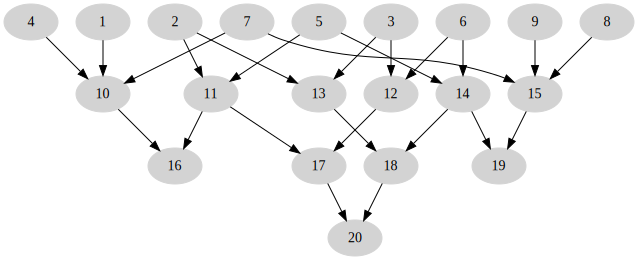

In [66]:
importlib.reload(lb)
importlib.reload(ag)
age = ag.AbstractAgent(env)
env.shut_down()
age.env.show()

In [67]:
age.start()

1.0%
2.0%
3.0%
4.0%
5.0%
6.0%
8.0%
9.0%
10.0%
11.0%
Create: 
O2 -> On
8       
├── A8 [0]
└── A2 [1]
2       
├── -0-> 8
│   ├── -0-> 1.0
│   └── -1-> 0.75
└── -1-> 0.0
Prune on : 8 in : 
2       
├── -0-> 8
│   ├── -0-> 1.0
│   └── -1-> 0.75
└── -1-> 0.0
-0-> 8  
├── -0-> 1.0
└── -1-> 0.75
True
remove : 
O2 -> On
8       
├── A8 [0]
└── A2 [1]
Create: 
O10 -> On
1       
├── A1 [0]
└── A10 [1]
10      
├── -0-> 1
│   ├── -0-> 0.0
│   └── -1-> 0.5
└── -1-> 0.0
Prune on : 1 in : 
10      
├── -0-> 1
│   ├── -0-> 0.0
│   └── -1-> 0.5
└── -1-> 0.0
-0-> 1  
├── -0-> 0.0
└── -1-> 0.5
True
remove : 
O10 -> On
1       
├── A1 [0]
└── A10 [1]
12.0%
Create: 
O10 -> On
1       
├── A1 [0]
└── A10 [1]
10      
├── -0-> 1
│   ├── -0-> 0.0
│   └── -1-> 0.5
└── -1-> 0.0
Prune on : 1 in : 
10      
├── -0-> 1
│   ├── -0-> 0.0
│   └── -1-> 0.5
└── -1-> 0.0
-0-> 1  
├── -0-> 0.0
└── -1-> 0.5
True
remove : 
O10 -> On
1       
├── A1 [0]
└── A10 [1]
Create: 
O10 -> On
1       
├── A1 [0]
└── A10 [1]
10  

In [68]:
for i_dbn in [10]:#range(1,21):
    print("-------DBN {} --------".format(i_dbn))
    for i_cpt in age.FMDP[i_dbn]["cpts"]:
        print("---CPT {}---".format(i_cpt))
        age.FMDP[i_dbn]["cpts"][i_cpt].print_tree()

-------DBN 10 --------
---CPT 1---
1       
├── -0-> 0.0
└── -1-> 4
    ├── -0-> 0.16666817642741819
    └── -1-> 7
        ├── -0-> 0.15789473684210525
        └── -1-> 1.0
---CPT 2---
2       
├── -0-> 0.0
└── -1-> 0.2173919666703961
---CPT 3---
3       
├── -0-> 0.0
└── -1-> 0.28767197292843477
---CPT 4---
4       
├── -0-> 0.0
└── -1-> 7
    ├── -0-> 10
    │   ├── -0-> 0.055556750151344744
    │   └── -1-> 1.0
    └── -1-> 1
        ├── -0-> 0.13333333333333333
        └── -1-> 1.0
---CPT 5---
5       
├── -0-> 0.0
└── -1-> 0.1604941293462893
---CPT 6---
6       
├── -0-> 0.0
└── -1-> 7
    ├── -0-> 0.125
    └── -1-> 0.4444444444444444
---CPT 7---
7       
├── -0-> 0.0
└── -1-> 0.3608563788354143
---CPT 8---
8       
├── -0-> 0.0
└── -1-> 0.2987019534353518
---CPT 9---
9       
├── -0-> 0.0
└── -1-> 0.2025320566213098
---CPT 10---
10      
├── -0-> 7
│   ├── -0-> 0.0
│   └── -1-> 4
│       ├── -0-> 0.0
│       └── -1-> 1
│           ├── -0-> 0.0
│           └── -1-> 0.91666666666

In [69]:
for i_dbn in [10]:#range(1,21):
    print("-------DBN {} --------".format(i_dbn))
    for i_cpt in age.FMDP[i_dbn]["cpts"]:
        print("---CPT {}---".format(i_cpt))
        c0 = age.FMDP[i_dbn]["cpts"][i_cpt].children[0].used
        c1 = age.FMDP[i_dbn]["cpts"][i_cpt].children[1].used
        print("0 : used = {},  1 : used = {} ".format(c0,c1))

-------DBN 10 --------
---CPT 1---
0 : used = False,  1 : used = False 
---CPT 2---
0 : used = False,  1 : used = False 
---CPT 3---
0 : used = False,  1 : used = False 
---CPT 4---
0 : used = False,  1 : used = False 
---CPT 5---
0 : used = False,  1 : used = False 
---CPT 6---
0 : used = False,  1 : used = True 
---CPT 7---
0 : used = False,  1 : used = False 
---CPT 8---
0 : used = False,  1 : used = False 
---CPT 9---
0 : used = False,  1 : used = False 
---CPT 10---
0 : used = True,  1 : used = False 
---CPT 11---
0 : used = False,  1 : used = False 
---CPT 12---
0 : used = False,  1 : used = False 
---CPT 13---
0 : used = False,  1 : used = False 
---CPT 14---
0 : used = False,  1 : used = False 
---CPT 15---
0 : used = False,  1 : used = False 
---CPT 16---
0 : used = False,  1 : used = False 
---CPT 17---
0 : used = False,  1 : used = False 
---CPT 18---
0 : used = False,  1 : used = False 
---CPT 19---
0 : used = False,  1 : used = False 
---CPT 20---
0 : used = False,  1 : us

In [70]:
for o in age.options:
    age.options[o].print_tree()
    age.options[o].opt_root.parent.print_tree()
    print(age.options[o].opt_root.used)
    print("-----------------------")

O10 -> On
7       
├── A7 [0]
└── 4 [1]
    ├── A4 [0]
    └── 1 [1]
        ├── A1 [0]
        └── O10 -> On [1]
10      
├── -0-> 7
│   ├── -0-> 0.0
│   └── -1-> 4
│       ├── -0-> 0.0
│       └── -1-> 1
│           ├── -0-> 0.0
│           └── -1-> 0.9166666666666666
└── -1-> 0.08333333333333333
True
-----------------------
O6 -> Off
7       
├── A7 [0]
└── A6 [1]
6       
├── -0-> 0.0
└── -1-> 7
    ├── -0-> 0.125
    └── -1-> 0.4444444444444444
True
-----------------------


In [64]:
age.options[(9,0)].opt_root.parent.print_tree()

KeyError: (9, 0)

In [98]:
for i_dbn in [4]:#range(1,21):
    print("-------DBN {} --------".format(i_dbn))
    for i_cpt in age.FMDP[i_dbn]["cpts"]:
        print("---CPT {}---".format(i_cpt))
        age.FMDP[i_dbn]["cpts"][i_cpt].print_tree()

-------DBN 4 --------
---CPT 1---
1       
├── -0-> 0.0
└── -1-> 1.0
---CPT 2---
2       
├── -0-> 0.0
└── -1-> 1.0
---CPT 3---
3       
├── -0-> 0.0
└── -1-> 1.0
---CPT 4---
4       
├── -0-> 0.9076919712421526
└── -1-> 0.10811024897068486
---CPT 5---
5       
├── -0-> 0.0
└── -1-> 1.0
---CPT 6---
6       
├── -0-> 0.0
└── -1-> 1.0
---CPT 7---
7       
├── -0-> 0.0
└── -1-> 1.0
---CPT 8---
8       
├── -0-> 0.0
└── -1-> 1.0
---CPT 9---
9       
├── -0-> 0.0
└── -1-> 1.0
---CPT 10---
10      
├── -0-> 0.0
└── -1-> 1.0
---CPT 11---
11      
├── -0-> 0.0
└── -1-> 0
---CPT 12---
12      
├── -0-> 0.0
└── -1-> 0
---CPT 13---
13      
├── -0-> 0.0
└── -1-> 0
---CPT 14---
14      
├── -0-> 0.0
└── -1-> 0
---CPT 15---
15      
├── -0-> 0.0
└── -1-> 0
---CPT 16---
16      
├── -0-> 0.0
└── -1-> 0
---CPT 17---
17      
├── -0-> 0.0
└── -1-> 0
---CPT 18---
18      
├── -0-> 0.0
└── -1-> 0
---CPT 19---
19      
├── -0-> 0.0
└── -1-> 0
---CPT 20---
20      
├── -0-> 0.0
└── -1-> 0


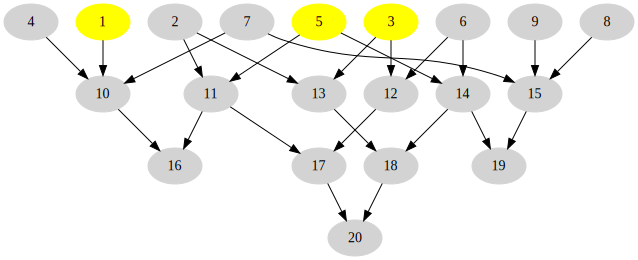

In [71]:
age.env.show()